In [2]:
#import the Libraries:
import numpy as np
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns\


#import the dataset :
df = pd.read_csv(r"C:\Users\Rutvik\Desktop\Diascan_main\Diascan\Backend_DiaType\detection\diabetes.csv")
# List of features to remove
features_to_remove = ['SkinThickness', 'Pregnancies']

# Drop the features from the DataFrame
df.drop(features_to_remove, axis=1, inplace=True)
print(df)

df.head()

df.info()

#Show the Columns :
df.columns

#it's part of statical analysis use to describe the dataset :
df.describe()

# Drop some Features : 
#dataset with transpose – here T is for the transpose
df.describe().T



#Check the values are null or Not :
df.isnull().head(10)


#count the num of null values :
df.isnull().sum()



     Glucose  BloodPressure  Insulin   BMI  DiabetesPedigreeFunction  Age  \
0        148             72        0  33.6                     0.627   50   
1         85             66        0  26.6                     0.351   31   
2        183             64        0  23.3                     0.672   32   
3         89             66       94  28.1                     0.167   21   
4        137             40      168  43.1                     2.288   33   
..       ...            ...      ...   ...                       ...  ...   
763      101             76      180  32.9                     0.171   63   
764      122             70        0  36.8                     0.340   27   
765      121             72      112  26.2                     0.245   30   
766      126             60        0  30.1                     0.349   47   
767       93             70        0  30.4                     0.315   23   

     Outcome  
0          1  
1          0  
2          1  
3          0  


Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
# Handaling Missing Value :
import pandas as pd 
import numpy as np

diabetes_df_copy = df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure', 'Insulin' , 'BMI']]=diabetes_df_copy[['Glucose','BloodPressure' , 'Insulin' , 'BMI']].replace(0,np.nan)

#Showing the count of NaNs :
print(diabetes_df_copy.isnull().sum())



Glucose                       5
BloodPressure                35
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


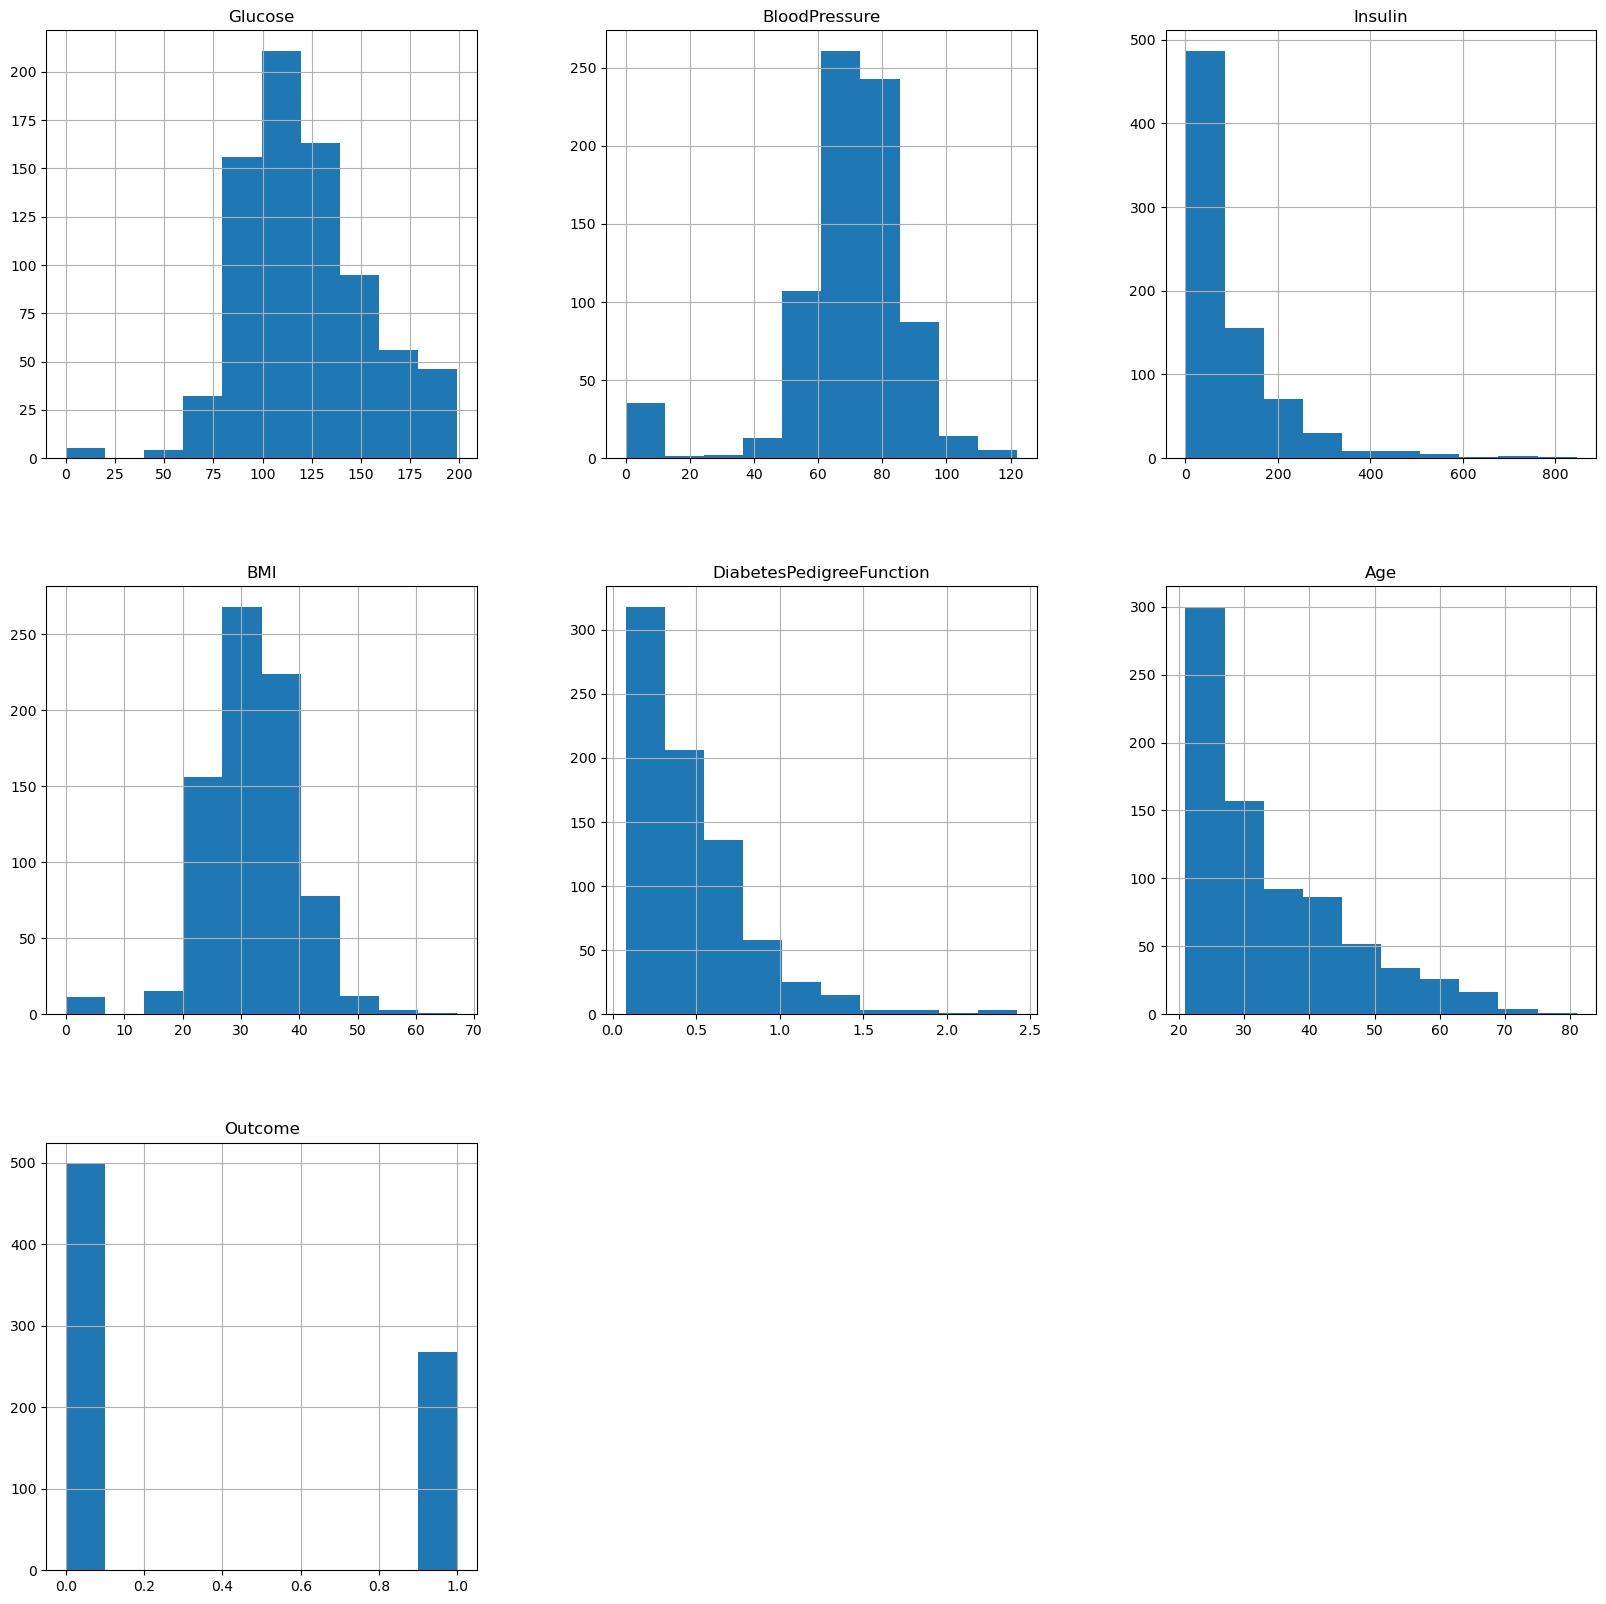

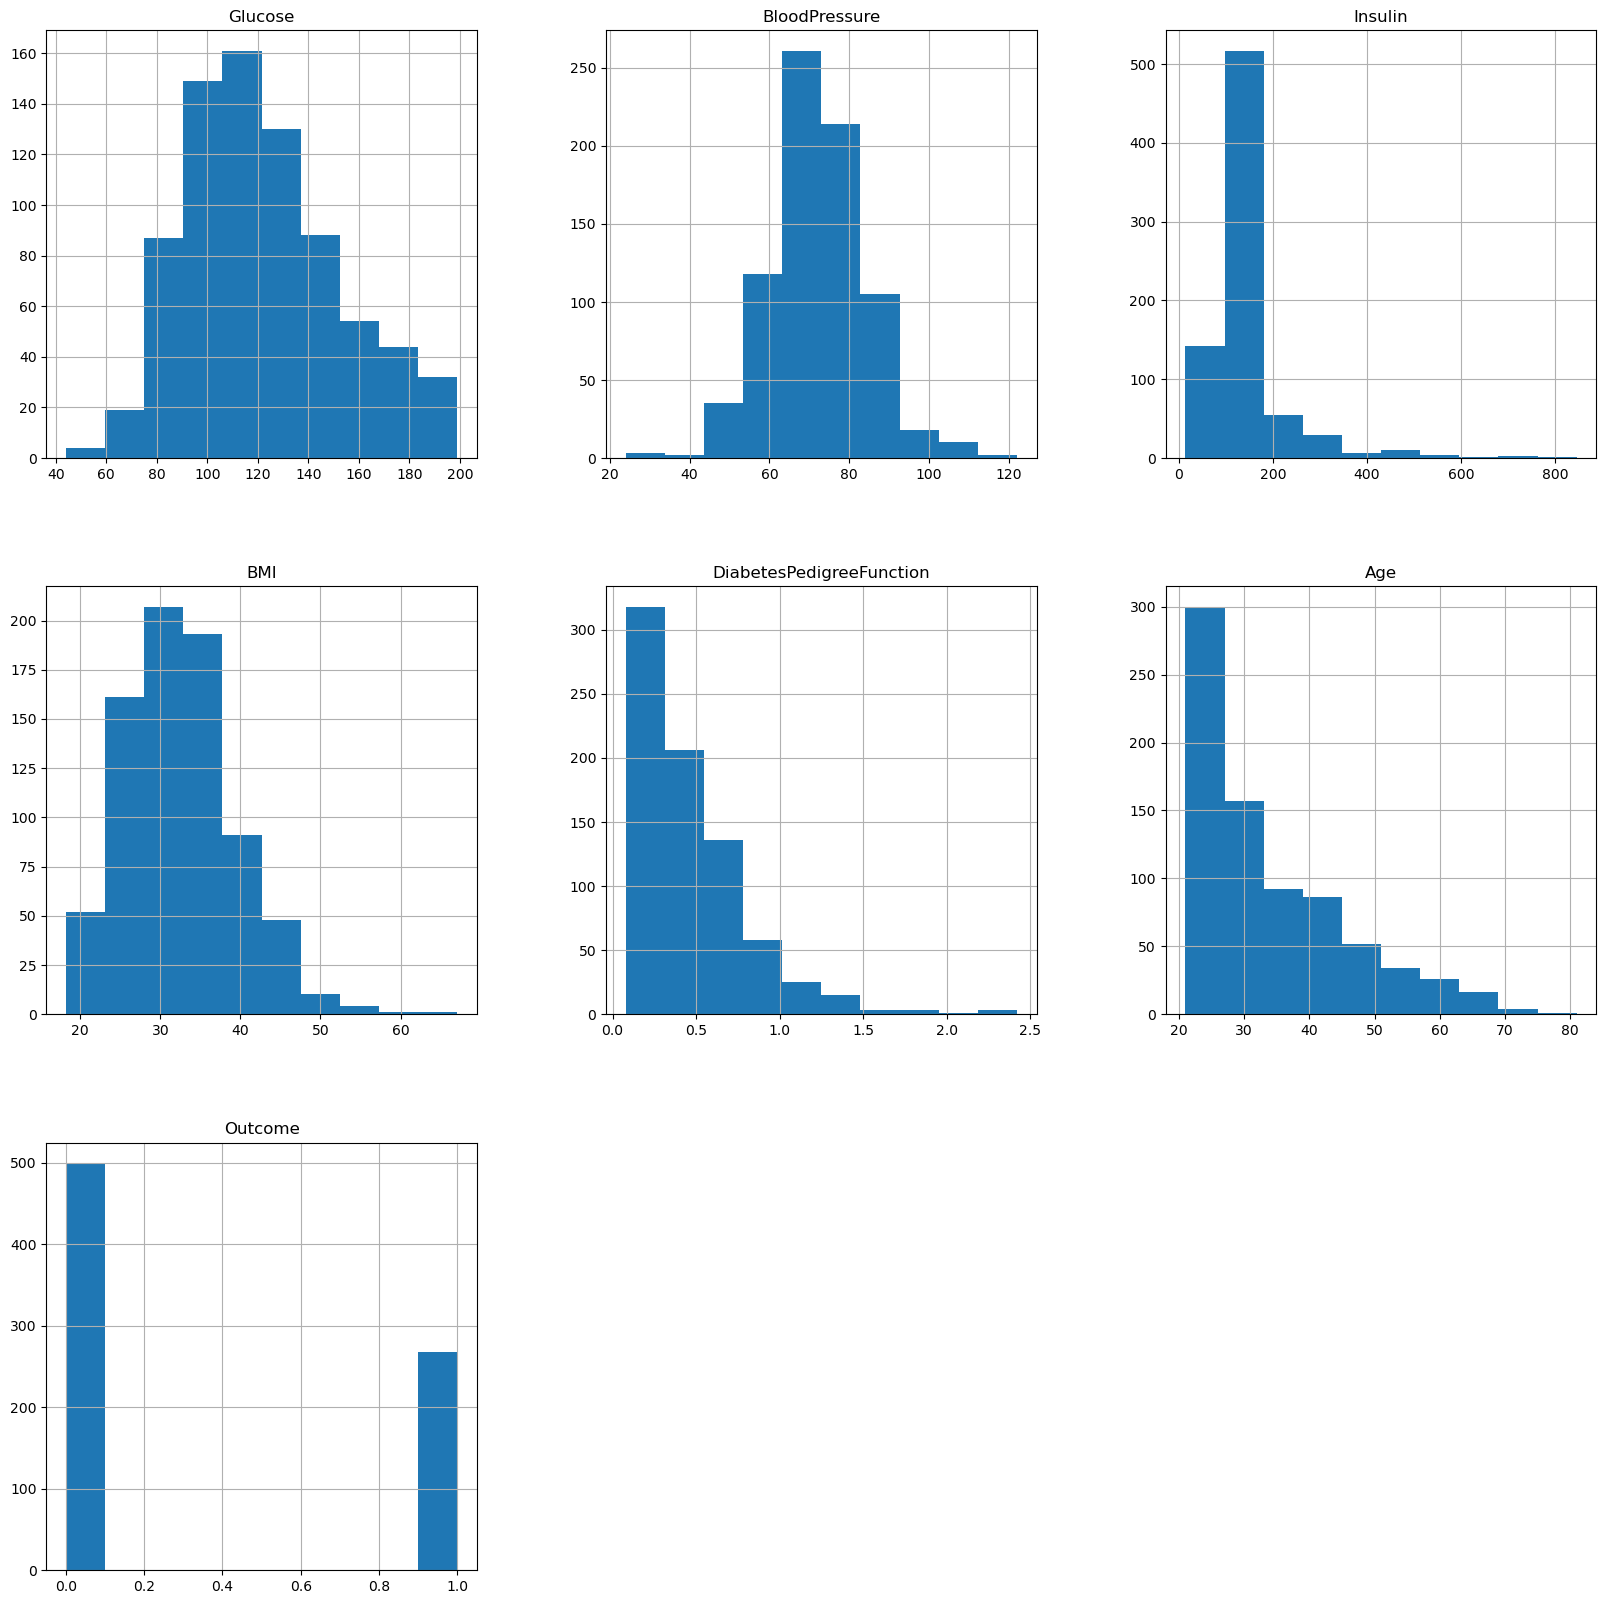

In [4]:

# Data Distribution :
import pandas as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns\



#plotting data Distribution before removing null values :
p = df.hist(figsize = (20,20))


#imputing Missing Values :

diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace=True)


# Data Distribution after imputing missing values :

p = diabetes_df_copy.hist(figsize=(20,20))



0    500
1    268
Name: Outcome, dtype: int64


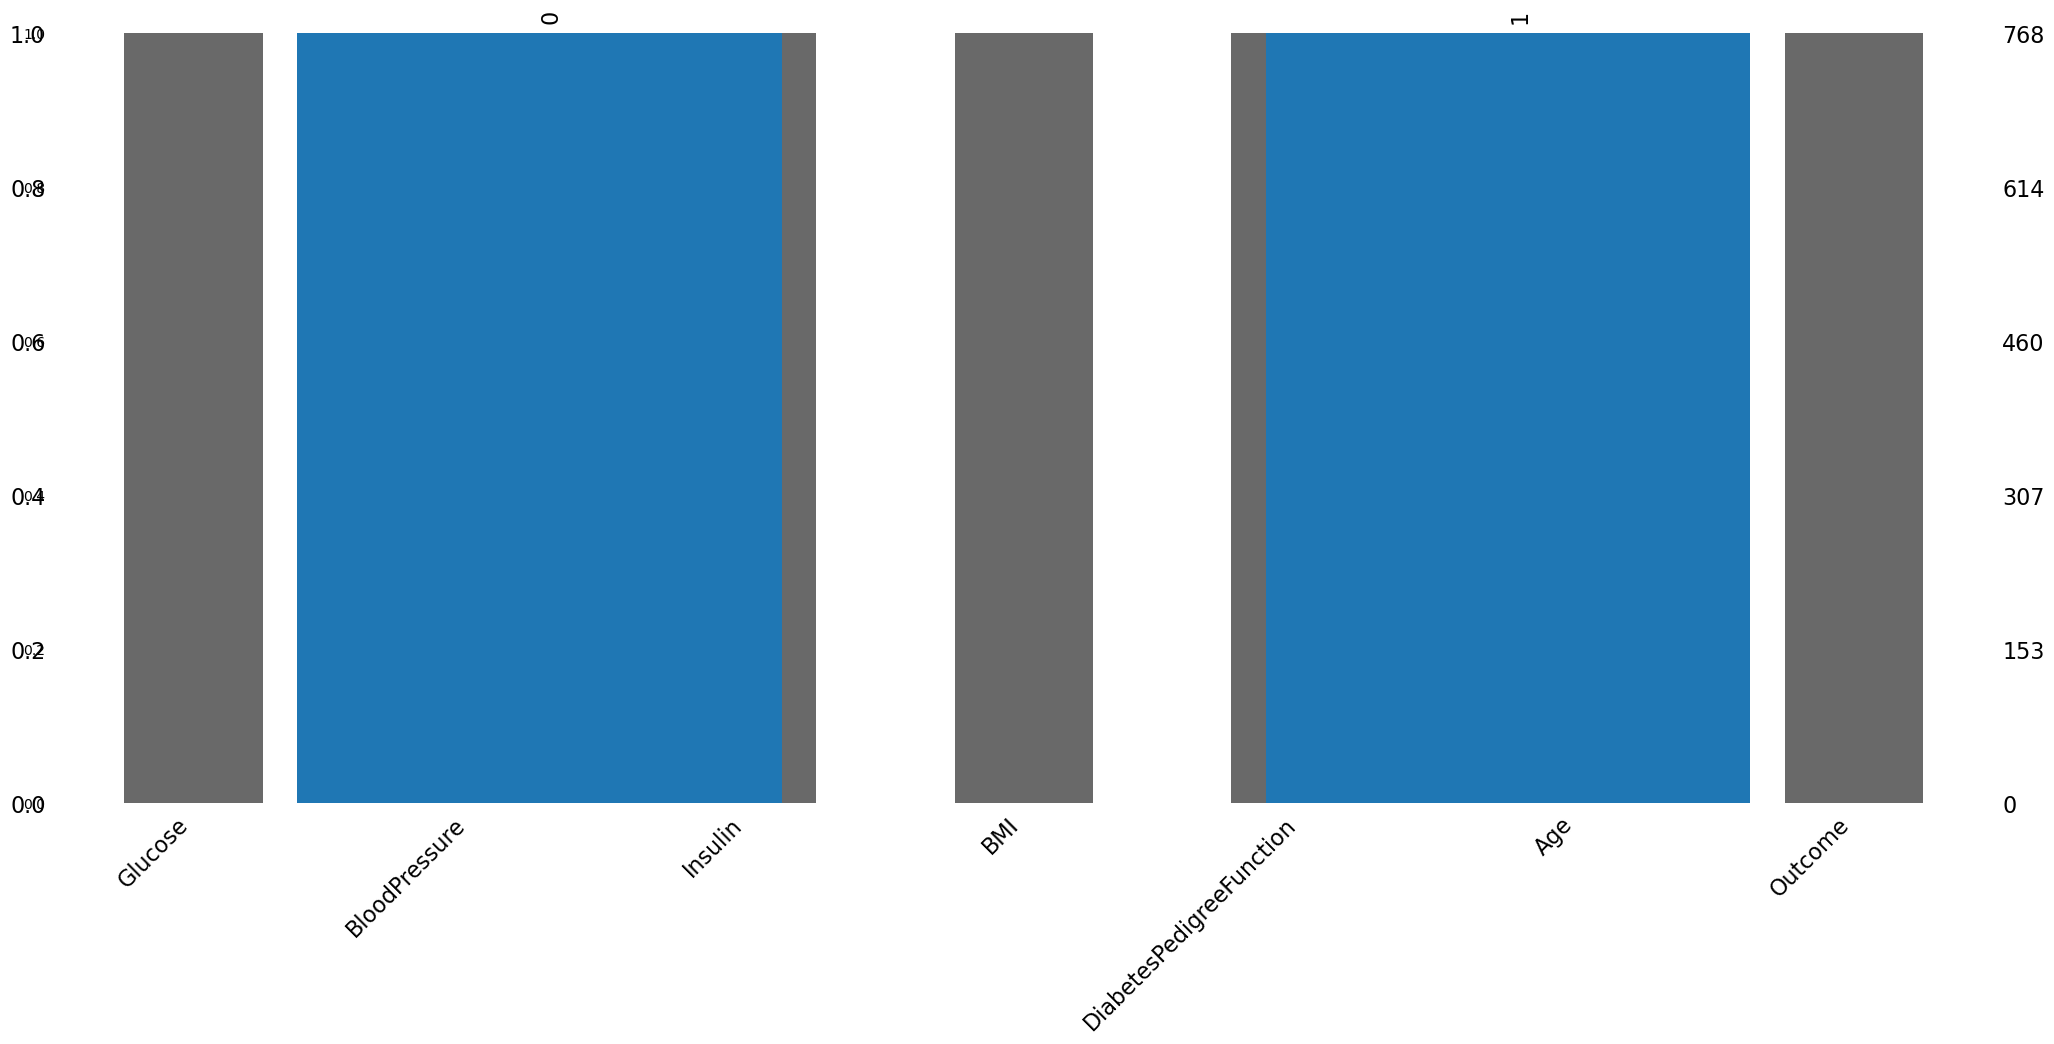

In [5]:

#This library use for visualize missing values in dataset :

import missingno as msno
import pandas as pd 


p = msno.bar(df)

#check how our columns is balanced :
color_wheel = {1: "#0392cf", 2: "#7bc043" }
colors = df["Outcome"].map(lambda x : color_wheel.get(x +1))
print(df.Outcome.value_counts())
p = df.Outcome.value_counts().plot(kind = 'bar') 



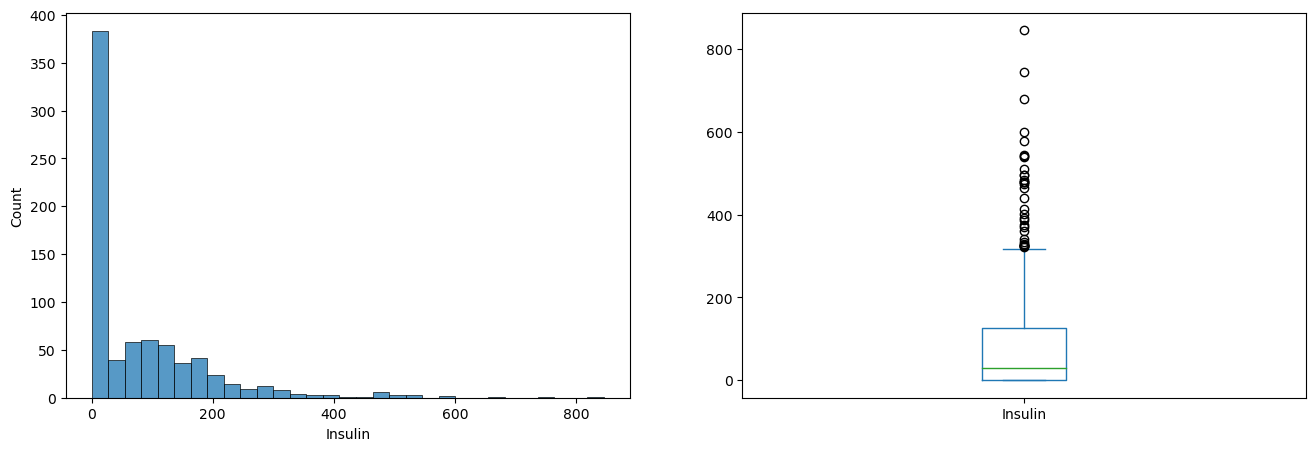

     Glucose  BloodPressure  Insulin   BMI  DiabetesPedigreeFunction  Age
0        148             72        0  33.6                     0.627   50
1         85             66        0  26.6                     0.351   31
2        183             64        0  23.3                     0.672   32
3         89             66       94  28.1                     0.167   21
4        137             40      168  43.1                     2.288   33
..       ...            ...      ...   ...                       ...  ...
763      101             76      180  32.9                     0.171   63
764      122             70        0  36.8                     0.340   27
765      121             72      112  26.2                     0.245   30
766      126             60        0  30.1                     0.349   47
767       93             70        0  30.4                     0.315   23

[768 rows x 6 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    

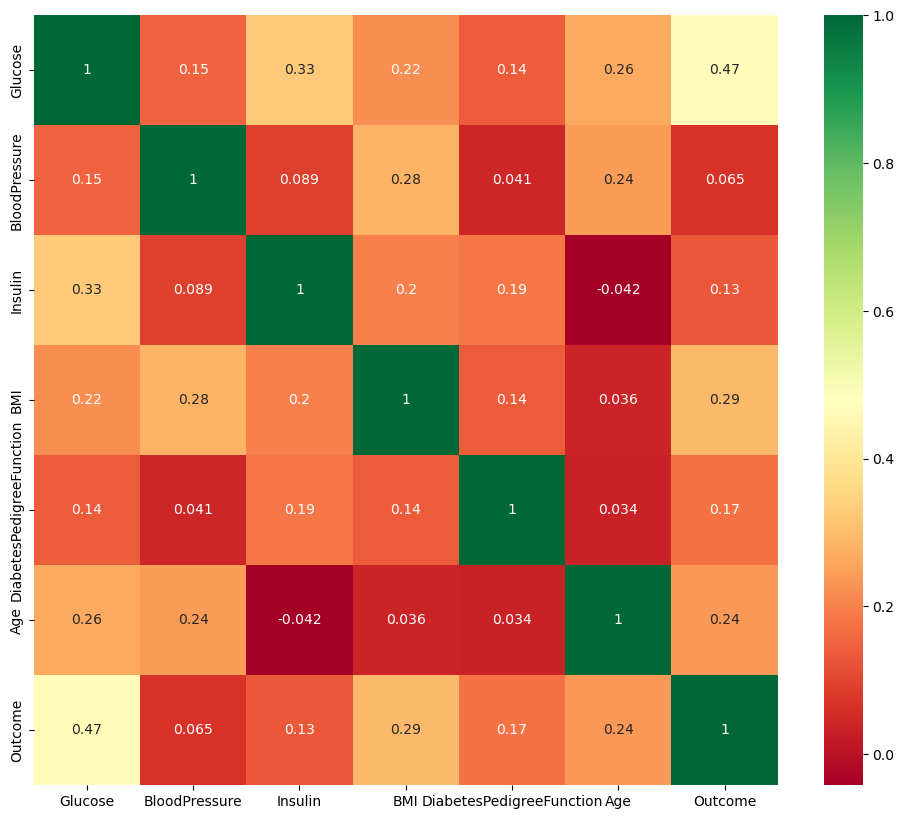

In [6]:

# Above "visualization is imbalanced we see Cleary"

import seaborn as sns\

#show the distribution of the 'insuline coloumn' :
plt.subplot(121) 
sns.histplot(df['Insulin'])


#plotting a boxplot of the same 'insulin' coloumn :
plt.subplot(122) 
df['Insulin'].plot.box(figsize = (16 ,5))  #16 inches wide and 5 inches tall
plt.show()

#heatmap is use for data visualization and analysis (represnt the numeric val in color )
#check corelation between all features before cleaning :
plt.figure(figsize = (12,10))

# annot specify whether the display the correlation :
#cmap = 'RdYlGn' specify color of the heatmap : 
#show no correlation , +ve correlation ,-ve correlation :
p = sns.heatmap(df.corr(), annot = True , cmap = 'RdYlGn')

#scalling the data set : making sure that all values are within a certain range :

diabetes_df_copy.head()

# Standerd Scalling :
#Standerd Scaling pendding use for better result :
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(['Outcome'], axis = 1)),columns=['Glucose','Bloodpressure','Insulin','BMI','DiabetesPedigreeFunction' , 'Age'])

X.head()

# Target Column :

y= diabetes_df_copy.Outcome
y.head()

# Model Bulding :
#Splitting the data set :
x = df.drop('Outcome' , axis = 1)
y = df['Outcome']
print(x)
print(y)



In [8]:
# split the data into trainig set and testing set :
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame containing the dataset

# Drop unnecessary columns in one go
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# Split data into training and testing sets :
# here 'X' is feature dataset.
# here 'y' is target var.
#here  test_size = 0.2 show , 80% data will used for testing and remainin will be used for trainig.
# here random_state = 7 show you will get the same split of the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Create a Random Forest classifier with 100 decision trees:
# use for regularization :
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

# Fit the model to the training data
model.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, random_state=0)

In [9]:
# Hyper  Parameter tunning Using GridSearch CV:
from sklearn.model_selection import GridSearchCV

# Define a RandomForestClassifier with default parameters
rf = RandomForestClassifier(random_state=0)

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Outlier Detection :
#Outlier Detection using IQR method :
# 'df' is data frame and  'features' is list of columns :
features = ['Outcome', 'SkinThickness', 'Pregnancies']

# Calculate Q1(25%) and Q3(75%) :

Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# identify rows where any of the features have values outside the IQR rage :
outliers = ((df[features] < (Q1 - 1.5* IQR))| (df[features] > (Q3 + 1.5*IQR))).any(axis=1)


# Remove the Outliers from the DataFrame :
df_cleaned = df[~outliers]

print("Original DataFrame shape :" , df.shape)
print("DataFrame shape after removing outliers :" , df_cleaned.shape)

# Model Building :
#Make the predictions on the training data :
predictions = model.predict(X_train)
print(predictions)

# Check the accurecy of the model (trainig data): 
#X_train is sample data :
#use for make predictions :
model_train = model.predict(X_train)



Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Score: 0.7654671464747433


KeyError: "['SkinThickness', 'Pregnancies'] not in index"

In [ ]:
# import metrics from sklearn library :
# this module is use for evaluting the performance of ml model :
from sklearn import metrics

# use the metrics.accuracy_score fun :
# calculate the Accuracy of the model .
print("Accuracy_Score=", format(metrics.accuracy_score(y_train,model_train)))

#  Check the accurecy of the model (testing data): 
#Check the accurecy of test data :

from sklearn import metrics
predictions = model.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

# Classification Report and Confusion matrix:
from sklearn.metrics import classification_report
print(classification_report(y_test , predictions))

